<a href="https://colab.research.google.com/github/jorge673/ADA-INFORMES-/blob/main/informe-caminomascorto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. **Descripccion del Problama:** 
---
##1.1 **Camino mas corto**

Como el nombre indica esta problematica nos ayuda a econtrar el camino mas corto de un nodo inicial hasta todos los nodos de un grafo que contenga todos los vertices mencionado

la distancia de un nodo $u$ hasta un nodo $v$, se calcula sumando todos los arcos que se recorre desde $u$ hasta $v$

>**Entrada:** un grafo $G(V,E)$ (siendo $V$ los vertices, y E los arcos), $s$ un nodo inicial perteneciente a $v$, y un valor real $l_e \geq 0$ asociado a cada arco $e\in E$.
>
>**Salida:** la distancia mas corta entre $l(s,v)$ siendo $v$ los nodos perteneciente a $V$

![image](https://i.imgur.com/6sgT9qo.png)

este problema nos podria servir por ejemplo a calcular distancias cortas entre ciudades o podria ayudar para saver direcciones para encontrar archivos, aun asi para este tipo de caso los arcos siempre seran positivos pero si llega a ingresar un arco negativo este no podra resolverlo, para eso esta la siguiente variante del problema

##1.2 **Camino mas corto (arcos negativos)**

muy parecido al punto 1.1 pero con la diferencia que tenemos que tenemos que identificar cuando la suma de todos los arcos da negativo ya que si llega a ser negeativo significa que se producen ciclos

>**Entrada:** un grafo $G(V,E)$ (siendo $V$ los vertices, y E los arcos), $s$ un nodo inicial perteneciente a $v$, y un valor real $l_e \geq 0$ asociado a cada arco $e\in E$.
>
>**Salida:** 2 opciones:
* la distancia mas corta entre $l(s,v)$ siendo $v$ los nodos perteneciente a $V$
* Alguna declaracion que nos indique que $G$ tiene un ciclo negativo


#2. **Algoritmos que resuelven este problema**
---
Antes de explicar cada funcion tenemos que definir algunas funciones:

####**Iniciar-fuente-unica**:

>![init](https://i.imgur.com/aXf4aqB.png)







In [ ]:
import sys

def Ifu(n,s):
  dist=[sys.maxsize for n in range(n)]
  child=[None for n in range(n)]
  dist[s]=0

  return dist,child


####**Relajar**:
>![relax](https://i.imgur.com/heis5FT.png)

In [ ]:
def relax(u,v,w,dist,child):
  if dist[v]> dist[u] + w:
    dist[v]= dist[u] + w
    child[v] = u


## 2.1 **Algoritmo de Dijkstra:**
---



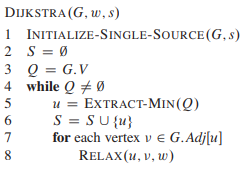

In [ ]:
def disktra(G,s,n):
  dist,child=Ifu(n,s)
  w = [[0 for x in range(n)] for x in range(n)]

  for u,v,p in G:
    w[u][v]=p

  for i in range(n):
    
    for j in range(n):
      if w[i][j]>0:
        
        relax(i,j,w[i][j],dist,child)
  return dist
G=[(0, 2, 70), (0, 1, 43), (1, 4, 60), (1, 2, 7), (3, 0, 40), (3, 4, 70), (4, 2, 53), (4, 2, 89), (2, 3, 79)]
n=5

disktra(G,0,n)

[0, 43, 50, 129, 103]

Este algortimo utiliza los arcos mas cortos que coneta desde el nodo de origen y luego repite este proceso hasta llegar a todos los nodos del grafo


##2.2 **Algoritmo de Bellman-ford**
---

In [87]:
def bellmanFord(G,s,n):
  dist,child=Ifu(n,s)

  for i in range(n):
    for u,v,w in G:
      relax(u,v,w,dist,child)
  for u,v,w in G:
    if dist[v]>dist[u]+w:
      return []

  return dist

G=[(0, 2, 70), (0, 1, 43), (1, 4, 60), (1, 2, 7), (3, 0, 40), (3, 4, 70), (4, 2, 53), (4, 2, 89), (2, 3, 79)]
n=5

bellmanFord(G,0,n)


[0, 43, 50, 129, 103]


Bellman-ford nos puede ayudar a resolver el problema del camino mas corto pero arcos negativos visto en el punto 1.2, para resolver el problema el algortimo funciona muy similar a drijkstra, pero no lo resuelve de manera voraz si no que en vez de tomar los arcos con menos elementos, relaja los vertices y repite este proceso $V-1$ veces, las repeticiones nos ayudan a que cada arco minimo recorra todos los vertices, no como Dijkstra que depende que el arco positivo

###**2.2.1 Sub-estructura optima**:
Supongamos que la cantidad de arcos de la ruta óptima $P$ para ir de $s$ a $v$ es $i$. De manera similar a otros problemas que hemos visto, la ruta más corta $P$ la podríamos obtener calculando las rutas más cortas $P’$  entre $s$ y un nodo intermedio $w$, limitada a $i-1$ arcos. Luego, sumaríamos la distancia entre $w$ y $v$, y nos quedaríamos con la mejor alternativa.

#### **Lema (subestructura óptima):**

*Sea $G=(V,E)$ un grafo dirigido con largo de arcos reales y una fuente $s \in V$. Suponiendo que $i \geq 1$ y $v\in V$, y sea $P$ la ruta más corta $s \leadsto v$ en $G$ con $i$ arcos o menos. Entonces, una de las dos afirmaciones siguientes es verdadera:*
- $P$ es la ruta más corta con $i-1$ arcos o menos.*
- $P$ es, para algún valor $w \in V$, la ruta más corta $s\leadsto w$ con $i-1$ arcos o menos, adicionada con el arco $(w,v) \in E$.*

###**2.2.2 Funcion de recurrencia**:
Una vez comprendidos los subproblemas que iremos creando, podemos definir la función de recurrencia. 

Consideremos como $L_{i,v}$ el largo mínimo de un camino $s\leadsto v$ con a lo más $i-1$ arcos y ciclos permitidos. Luego, para todo $i\geq 1$ y $v \in V$ tenemos que:

$L_{i,v} =
\min \left\{
 \begin{array}{cc}
 L_{i-1,v} & \text{(case 1)} \\
 \min\limits_{(w,v)\in E} \{L_{i-1,w}+l_{wv}\} & \text{(case 2)}
    	\end{array}
\right\}$

Los **subproblemas de base** serían, para todo $v\in V$:

$L_{0,v} =
\left\{
\begin{array}{cc}
0 & \text{si $$s=v$$} \\
+\infty & \text{en otro caso.}
\end{array}
\right.$

###**2.2.3 Pseudo-codigo**:
![bmf](https://i.imgur.com/WragfVN.png)

* Se inicianlizan los vertices
* **Relajamos** todos los vertices
* Verificamos que la suma de cada arco no sea negativa, si lo es se retorna FALSO
* Al terminar retornamos VERDADERO indicando que el problema ya fue resuelto


#3. **Correctitud**
---
##3.1 **correctitud Bellman-ford**

Teorema:
>_"despues de cada i-esima iteracion si la distancia(u) no es infinito, es igual a la longitud de algun arcos y si hay un camino de $s$ hasta $u$ con como maximo $i$ aritstas entonces la distancia(u) es la longitud del camino mas corto de $s$ a $u$ como maximo $i$ aristas"_

Prueba:

caso base: concideramos i=0 y el momento antes del ciclo `for` entonces para el vertice de inicio $s$ la distancia es 0 lo cual es correcto ya que la distancia de $s$ hasta $s$ es 0. para los otros vertices $u$ la distancia es **infinito** ya que no existe un camino de $s$ hasta $u$ con 0 arcos

caso inductivo:

Vamos a provar la primera parte, consideramos la parte cuando un vertice se actualiza `si v.d > u.d + w(u,v)`(2.2.2), suponemos que la `u.d` es la distancia de la fuente hasta $u$ y `u.d + w(u,v)` es `v.d` osea la longitud de la fuente hasta $v$ que sigue el camino desde la fuente hasta u y luego va por v.

Para la segunda parte considere un camino mas corto $P$ (puede haber mas de uno) desde la fuente hasta $v$ con un maximo de arcos $i$, si $u$ es el ultimo vertice antes de $v$ en el camino $P$ entonces la parte del camino desde la fuente hasta $u$ es el camino más corto desde la fuente hasta u con como máximo $i$-1 arcos, porque si no lo fuera debe haber estrictamente un camino desde la fuente hasta $u$ con por lo menos i-1 vertices, luego podemos agregar el arco $u$ hasta $v$ y seria un camino mas corto $P$ lo cual es una contradiccion.

Asumiendo por induccion la distancia de $u$ despues de $i-1$ iteraciones is a lo mas el tamaño del camino de la fuente hasta $u$, por lo cual la distancia el peso de arco(u,v) + la distancia de $u$, es a lo mas el tamaño de $P$. en la $i$-esima iteracion la distancia de v se puede comparar con el arco(u,v) + la distancia de $u$, y se asigna de la misma manera que si arco(u,v) + la distancia de $u$ fuera pequeño, por lo cual despues de $i$ iteraciones la distancia de v es a lo mas el tamaño de $P$ es decir que el largo del camino mas corto de la fuente hasta el vertice $v$ tiene la cantidad de $i$ arcos

Si no hay ciclos de peso-negativos cada camino corto visita cada vertice a lo mas una vez, entonces en el tercer paso
no se puede hacer ninguna mejora. En el caso contrario suponga que no se pueda hacer ninguna mejora,  Entonces para cualquier ciclo con vértices v [0], ..., v [ k −1],

$v[i].distance <= v[i-1 ($modulo $k)].distance + v[i-1 (modulo k)]v[i].weight$

Sumando alrededor del ciclo, los términos distancia dev[i] y distancia de v[i −1(modulo k )] se cancelan, dejando

$0 <= sum$ desde 1 hasta k de $v[i-1 ($modulo $k)]$ $v[i].peso$

Es decir, cada ciclo tiene un peso no negativo.

Asi podemos porbar que el algoritmo de bellman-ford es correcto


#4. **Complejida**
---
##4.1 **Bellman-Ford**
Para calcular la complejida temporal tenemos que analisar cada paso y calcular cuanto se demoran 

1. Primero iniciamos las distancia de cada uno de los vertices con infinito o algun numero que sea lo suficientemente grande, este proceso se demora $O(V)$ siendo $V$ los vertices de $G$

2. A cada vertice del grafo, recorremos sus arcos y se relajan osea que se calcula el camino mas corto a estos, recorrer los vertices demora $O(V)$, recorrer los arcos y la relajacion de un arco demora $O(1)$ todos juntos equivalen a $O(V*E)$ siendo $V$ los vertices de $G$ y $E$ arcos de $G$

3. finalmente se recorren todos los arco para verificar que no exista ninguna distancia negativa lo cual demora O(E)

tomando todos los pasos necesarios podemos sumar cuanto tardan cada uno de ellos y asi poder caluclar cuanto vale su complejidad temporal

$$T(n) = O(V) + O(VE) + O(E)$$

dando como resulatdo que la complejidad temporal es $O(VE)$

#5. Experimentos
---

In [ ]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

##5.1 **Tiempo de Bellman-Ford en 25 casos**


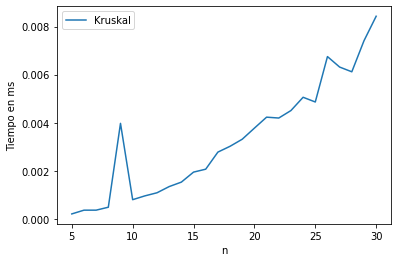

In [91]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy
import random

x=[]
y_b = []

for n in range(5,31):
  grafo,nodo = instance_generator(n)

  t_Kruskal = repeat(setup="from __main__ import bellmanFord", stmt=f"bellmanFord({grafo},{nodo},{n})", repeat=1, number=10)

  x.append(n)
  y_b.append(t_Kruskal)


plt.plot(x,y_b)

plt.legend(["Kruskal", "Prim"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

* los casos varian con el tamaño de n pero eso no quiere decir que un caso anterior sea menor a uno con mucho mas tamaño ya que depende de los arcos y cuanto es el tamaño que tengan estos y el largo por ejemplo puede haber el caso que solo alla un arco prinsipal 0-1 1-2 2-3 ... (n-1)-n por lo cual solo hay un camino el cual es muy largo